In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [5]:
import os
import pandas as pd


image_folder = r'C:\Users\prera\Downloads\DR_data\train'
image_filenames = [filename.split('.')[0] for filename in os.listdir(image_folder) if filename.endswith('.jpeg')]


csv_file_path = r'C:\Users\prera\Downloads\DR_data\trainLabels.csv'
df = pd.read_csv(csv_file_path)


filtered_df = df[df['image'].isin(image_filenames)]


dataset_folder = os.path.dirname(csv_file_path)
cleaned_csv_file_path = os.path.join(dataset_folder, "cleaned_labels.csv")
filtered_df.to_csv(cleaned_csv_file_path, index=False)

print("Cleaned CSV file saved successfully in the dataset folder.")


Cleaned CSV file saved successfully in the dataset folder.


In [6]:
data = pd.read_csv('cleaned_labels.csv')
print(data.value_counts().sum())
print(data['level'].unique())
print(data['level'].value_counts().unique())
data.head()

8408
[0 1 2 4 3]
[6150 1283  588  221  166]


,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


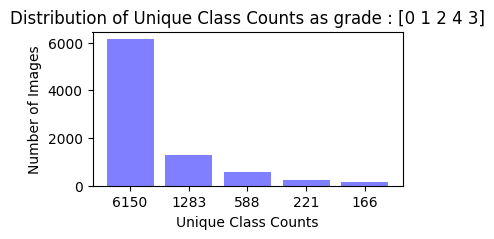

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = data['level'].value_counts()

unique_counts = class_counts.unique()

plt.figure(figsize=(4, 2))  
plt.bar(range(len(unique_counts)), unique_counts, color='blue', alpha=0.5)

plt.xlabel('Unique Class Counts')
plt.ylabel('Number of Images')
plt.title('Distribution of Unique Class Counts as grade : [0 1 2 4 3]')

plt.xticks(range(len(unique_counts)), unique_counts)

plt.show()

Class distribution after undersampling: {0: 166, 1: 166, 2: 166, 3: 166, 4: 166}
Resampled class counts: {0: 166, 1: 166, 2: 166, 3: 166, 4: 166}


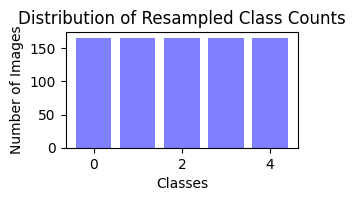

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Assuming 'data' is your DataFrame and 'image' and 'level' are the columns
X = data['image']
y = data['level']

# Reshape X and y to be suitable for resampling
X_array = X.values.reshape(-1, 1)
y_array = y.values

# Define class counts
class_counts = {0: 6150, 1: 1283, 2: 588, 3: 166, 4: 221}
target_count = min(class_counts.values())

# Undersampling: Reduce the size of the majority classes to the target count
undersampler = RandomUnderSampler(sampling_strategy={label: target_count for label in class_counts.keys()})
X_under, y_under = undersampler.fit_resample(X_array, y_array)

# Print the class distribution after undersampling
print("Class distribution after undersampling:", dict(zip(*np.unique(y_under, return_counts=True))))

# Oversampling: Increase the size of the minority classes to match the new majority class size
oversampler = RandomOverSampler(sampling_strategy={label: target_count for label in np.unique(y_under)})
X_resampled, y_resampled = oversampler.fit_resample(X_under, y_under)

# Get the new class counts after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
resampled_class_counts = dict(zip(unique, counts))
print("Resampled class counts:", resampled_class_counts)

# Plot the resampled class counts
plt.figure(figsize=(3, 1.5))
plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='blue', alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Resampled Class Counts')
plt.show()

In [9]:
new_X = []
for i in X_resampled:
  for j in i:
    new_X.append(j)

In [10]:
y_resampled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
# Create a new dataframe with resampled data
resampled_data = {'image': new_X,
        'level': y_resampled}

balanced_data = pd.DataFrame(resampled_data)


balanced_data.sample(10)

,image,level
536,11529_left,3
14,15040_left,0
35,14044_left,0
289,16524_right,1
529,16600_left,3
766,15038_left,4
302,12515_right,1
565,11267_right,3
75,17517_right,0
679,10017_left,4


In [12]:
print(balanced_data.value_counts().sum())
print(balanced_data['level'].unique())
print(balanced_data['level'].value_counts().unique())

830
[0 1 2 3 4]
[166]


In [13]:
balanced_data['image'] = balanced_data['image']+'.jpeg'
balanced_data['level'] = balanced_data['level'].astype(str)
balanced_data.head()

,image,level
0,14526_right.jpeg,0
1,11010_right.jpeg,0
2,1910_left.jpeg,0
3,14253_right.jpeg,0
4,14653_left.jpeg,0


In [14]:
train, val = train_test_split(balanced_data, test_size=0.2, random_state=42)

In [15]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

In [16]:
import os

image_folder = 'C:\\Users\\prera\\Downloads\\DR_data\\train'

image_filenames = [filename.split('.')[0] for filename in os.listdir(image_folder) if filename.endswith('.jpeg')]

count_of_train = len(image_filenames)
print("Count of images in the training dataset:", count_of_train)


Count of images in the training dataset: 8408


In [17]:
import cv2
import numpy as np

def remove_outer_boundary_effectss(image, target_size=(224, 224)):
    # Calculate the sum of pixel values along the horizontal axis at the center of the image
    x = image[image.shape[0] // 2, :, :].sum(1)
    
    # Estimate the radius of the circular boundary effect
    r = (x > x.mean() / 10).sum() // 2
    
    # Calculate the scale factor based on the target size and estimated radius
    s = (max(target_size) * 1.0) / (2 * r)
    
    # Resize the image using the scale factor to compensate for the boundary effect
    resized_image = cv2.resize(image, (0, 0), fx=s, fy=s)
    
    # Ensure the resized image matches the target size
    resized_height, resized_width, _ = resized_image.shape
    resized_size = max(resized_height, resized_width)
    
    padding = ((0, max(target_size) - resized_height), (0, max(target_size) - resized_width), (0, 0))
    if resized_size < max(target_size):
        padding = ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0))
        resized_image = np.pad(resized_image, padding, mode='constant', constant_values=0)
    else:
        start_x = (resized_width - max(target_size)) // 2
        start_y = (resized_height - max(target_size)) // 2
        resized_image = resized_image[start_y:start_y+max(target_size), start_x:start_x+max(target_size)]
    return resized_image

def crop_to_circle(image):
    # Get the dimensions of the image
    height, width, _ = image.shape
    # Calculate the center and radius of the circle
    center_x, center_y = width // 2, height // 2
    radius = min(center_x, center_y)
    
    # Create a mask with a filled circle in the center
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.circle(mask, (center_x, center_y), radius, 255, thickness=-1)
    
    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Crop the image to the bounding box of the circle
    cropped_image = masked_image[center_y - radius:center_y + radius, center_x - radius:center_x + radius]
    
    return cropped_image

def apply_clahe(img):
    
    # Extract the green channel from the image
    green_channel = img[:, :, 1]
    
    # Convert the green channel to 8-bit unsigned integer format
    green_channel_8u = cv2.convertScaleAbs(green_channel)
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the green channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_green_8u = clahe.apply(green_channel_8u)
    
    # Convert the CLAHE output to float32
    clahe_green_16u = np.array(clahe_green_8u, dtype=np.uint16)
    clahe_green_float = clahe_green_16u.astype(np.float32)
       
    # Merge the CLAHE processed green channel back with the original red and blue channels
    processed_img = img.copy()
    processed_img[:, :, 1] = clahe_green_float

    return processed_img


def denoise_image(image):
    # Denoise the image using Gaussian blur
    denoised_image = cv2.GaussianBlur(image, (3, 3), 0)
    return denoised_image


def crop_and_preprocess_retinopathy_image(image):
    
    remove_outer_boundary_image= remove_outer_boundary_effectss(image)

    #remove_outer_boundary= remove_outer_black_regions(image)
    # Crop the image to a square aspect ratio around the center
    cropped_image = crop_to_circle(remove_outer_boundary_image)
    
    # Preprocess the cropped image
    preprocessed_image = apply_clahe(cropped_image)

    denoised_image = denoise_image(preprocessed_image)
    
    return denoised_image

In [18]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

import random

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip = False, 
    preprocessing_function=crop_and_preprocess_retinopathy_image
    #preprocessing_function=augment_and_preprocess,preprocess_retinopathy_image
)
    

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train, 
    directory=r'C:\Users\prera\Downloads\DR_data\train',
    x_col='image',
    y_col='level',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


val_datagen = ImageDataGenerator(    
    rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip = False, 
    preprocessing_function=crop_and_preprocess_retinopathy_image)


val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=r'C:\Users\prera\Downloads\DR_data\train',
    x_col='image',
    y_col='level',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 664 validated image filenames belonging to 5 classes.
Found 166 validated image filenames belonging to 5 classes.


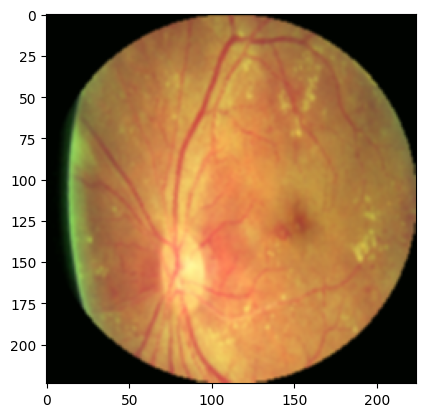

In [33]:
plt.imshow(next(train_generator)[0][0])

In [19]:
import os
import cv2
import numpy as np

output_folder = r'C:\Users\prera\Downloads\DR_data\bengraham_img'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save augmented images
num_batches = 10  # Number of batches to process
for batch_num in range(num_batches):
    images, labels = next(train_generator)
    for i, img in enumerate(images):
        # Convert the image from float32 to uint8
        img = (img * 255).astype(np.uint8)
        # Convert the image from RGB to BGR (because OpenCV uses BGR format)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        # Save the image
        file_name = f'batch_{batch_num+1}_image_{i+1}.png'
        file_path = os.path.join(output_folder, file_name)
        cv2.imwrite(file_path, img)


In [34]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


Reloading Tuner from my_dir\intro_to_kt\tuner0.json



c:\Users\prera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'l2_regularizer': 0.006, 'dropout_rate_1': 0.5, 'dropout_rate_2': 0.2, 'dropout_rate_3': 0.2, 'learning_rate': 0.0003507215228728303, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Epoch 1/40


c:\Users\prera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3605 - loss: 3.8249 - val_accuracy: 0.3916 - val_loss: 3.2915
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3915 - loss: 3.2029 - val_accuracy: 0.3373 - val_loss: 2.9962
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3918 - loss: 2.9381 - val_accuracy: 0.3434 - val_loss: 2.8069
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3635 - loss: 2.7690 - val_accuracy: 0.4036 - val_loss: 2.6388
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3710 - loss: 2.5847 - val_accuracy: 0.3434 - val_loss: 2.5289
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.3848 - loss: 2.4768 - val_accuracy: 0.3916 - val_loss: 2.3802
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.3728 - loss: 2.4157 - val_accuracy: 0.3253 - val_loss: 2.3260
Epoch 8/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3776 - loss: 2.3132 - val_accuracy: 0.3675 - val_loss: 2.2520
Epo

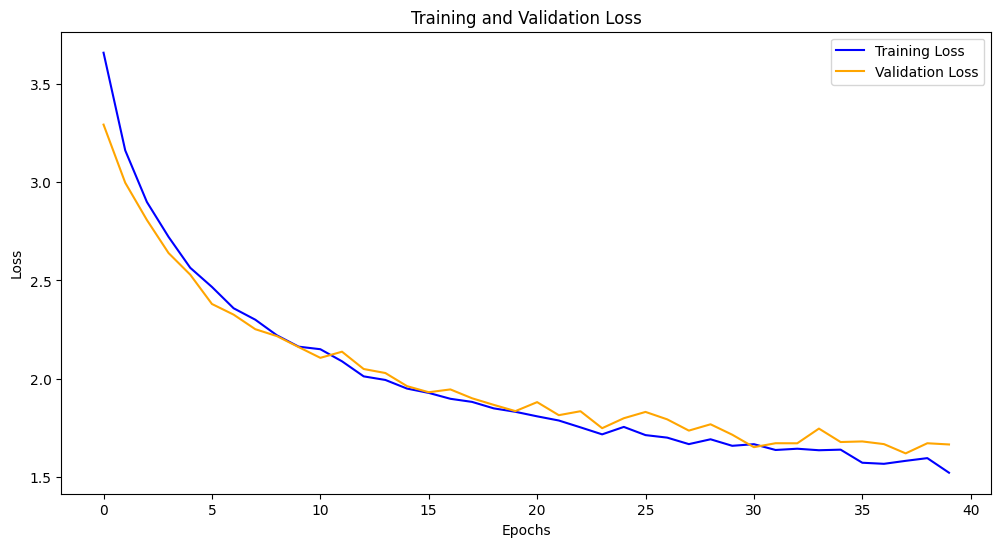

In [35]:
import keras_tuner as kt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load InceptionV3 with pre-trained weights
def build_model(hp):
    inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers
    for layer in inceptionv3.layers:
        layer.trainable = False

    # Build the model
    x = inceptionv3.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_1', 0.1, 0.5, step=0.1))(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_2', 0.1, 0.5, step=0.1))(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_3', 0.1, 0.5, step=0.1))(x)
    NUM_CLASSES = 5  # Change this to your number of classes
    inceptionv3_pred = Dense(NUM_CLASSES, activation='softmax')(x)

    model_V3 = Model(inputs=inceptionv3.input, outputs=inceptionv3_pred)

    # Compile the model
    learning_rate = hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')
    model_V3.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model_V3

# Create a Keras Tuner object
#tuner = kt.Hyperband(
 #   build_model,
 #   objective='val_accuracy',
 #   max_epochs=20,  #change it to 10 for faster
  #  hyperband_iterations=2,
  #  directory='my_dir',
  #  project_name='intro_to_kt'
#)

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Set the number of trials to 10
    directory='my_dir',
    project_name='intro_to_kt'
)


# Perform hyperparameter search
tuner.search(train_generator, validation_data=val_generator, epochs=10) #for better result epochs=10 or 20

# Retrieve the best model
best_model_V3 = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Train the best model
history_1=best_model_V3.fit(train_generator, validation_data=val_generator, epochs=40)


# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['loss'], label='Training Loss', color='blue')
plt.plot(history_1.history['val_loss'], label='Validation Loss', color='orange' )
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [36]:
val_loss, val_accuracy = best_model_V3.evaluate(val_generator)

print("Validation Accuracy:", val_accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3550 - loss: 1.6451
Validation Accuracy: 0.34939759969711304


In [37]:
import os

# Define the directory and file path
model_directory = 'models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_save_path = os.path.join(model_directory, 'best_model_V3.h5')

# Save the model
best_model_V3.save(model_save_path)

# Print the path of the saved model
print("Model saved at:", model_save_path)


Model saved at: models\best_model_V3.h5


Trial 10 Complete [00h 19m 45s]
val_accuracy: 0.21084336936473846

Best val_accuracy So Far: 0.2469879537820816
Total elapsed time: 03h 10m 55s


c:\Users\prera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'l2_regularizer': 0.010000000000000002, 'dropout_rate_1': 0.30000000000000004, 'dropout_rate_2': 0.30000000000000004, 'dropout_rate_3': 0.2, 'learning_rate': 3.3403737427200065e-05, 'momentum': 0.8}
Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.2227 - loss: 23.8579 - val_accuracy: 0.1807 - val_loss: 23.1910
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.1737 - loss: 23.0798 - val_accuracy: 0.2169 - val_loss: 22.4614
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.2140 - loss: 22.3330 - val_accuracy: 0.2169 - val_loss: 21.7598
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.1835 - loss: 21.6288 - val_accuracy: 0.2169 - val_loss: 21.0821
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.1825 - loss: 20.9836 - val_accuracy: 0.2169 - val_loss: 20.4336
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.1738 - loss: 20.3416 - val_accuracy: 0.1807 - val_loss: 19.8128
Epoch 7/40

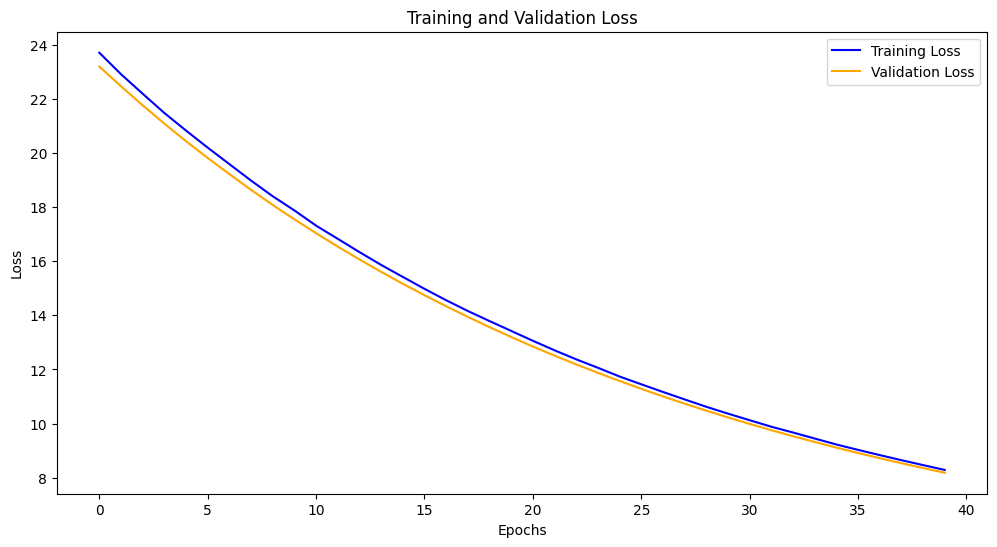

In [38]:
import keras_tuner as kt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet50 with pre-trained weights
def build_model(hp):
    resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers
    for layer in resnet50.layers:
        layer.trainable = False

    # Build the model
    x = resnet50.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_1', 0.1, 0.5, step=0.1))(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_2', 0.1, 0.5, step=0.1))(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_3', 0.1, 0.5, step=0.1))(x)
    NUM_CLASSES = 5  # Change this to your number of classes
    resnet50_pred = Dense(NUM_CLASSES, activation='softmax')(x)

    model_50= Model(inputs=resnet50.input, outputs=resnet50_pred)

    # Compile the model
    learning_rate = hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')
    model_50.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model_50

# Create a Keras Tuner object
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='resnet50_kt'
)

# Perform hyperparameter search
tuner.search(train_generator, validation_data=val_generator, epochs=5) #make it 20

# Retrieve the best model
best_model_50 = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Train the best model
history_2=best_model_50.fit(train_generator, validation_data=val_generator, epochs=40)

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [39]:
val_loss, val_accuracy = best_model_50.evaluate(val_generator)

print("Validation Accuracy:", val_accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1840 - loss: 8.1841
Validation Accuracy: 0.20481927692890167


In [45]:
import os

# Define the directory and file path
model_directory = 'models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_save_path = os.path.join(model_directory, 'best_model_50.h5')

# Save the model
best_model_50.save(model_save_path)

# Print the path of the saved model
print("Model saved at:", model_save_path)


Model saved at: models\best_model_50.h5


Trial 10 Complete [00h 08m 59s]
val_accuracy: 0.20481927692890167

Best val_accuracy So Far: 0.21686747670173645
Total elapsed time: 01h 26m 54s


c:\Users\prera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'l2_regularizer': 0.001, 'dropout_rate_1': 0.1, 'dropout_rate_2': 0.5, 'dropout_rate_3': 0.4, 'learning_rate': 0.00017684481940368423}
Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.1821 - loss: 3.9957 - val_accuracy: 0.1807 - val_loss: 3.7990
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.1897 - loss: 3.7542 - val_accuracy: 0.1807 - val_loss: 3.5937
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.1655 - loss: 3.5941 - val_accuracy: 0.1807 - val_loss: 3.4277
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.1903 - loss: 3.4061 - val_accuracy: 0.1988 - val_loss: 3.2813
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.1911 - loss: 3.2636 - val_accuracy: 0.1807 - val_loss: 3.1578
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.1862 - loss: 3.1429 - val_accuracy: 0.2169 - val_loss: 3.0448
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.2027 - loss: 3.0

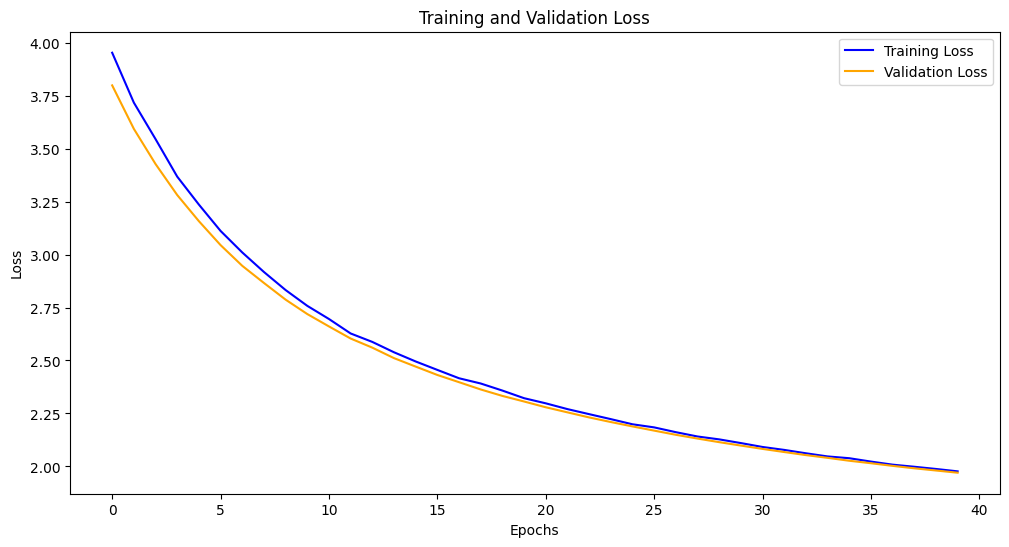

In [41]:
import keras_tuner as kt
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load EfficientNetB5 with pre-trained weights
def build_model(hp):
    efficientnetb5 = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers
    for layer in efficientnetb5.layers:
        layer.trainable = False

    # Build the model
    x = efficientnetb5.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_1', 0.1, 0.5, step=0.1))(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_2', 0.1, 0.5, step=0.1))(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_3', 0.1, 0.5, step=0.1))(x)
    NUM_CLASSES = 5  # Change this to your number of classes
    efficientnetb5_pred = Dense(NUM_CLASSES, activation='softmax')(x)

    model_B5 = Model(inputs=efficientnetb5.input, outputs=efficientnetb5_pred)

    # Compile the model
    learning_rate = hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')
    model_B5.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model_B5

# Create a Keras Tuner object
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='efficientnetb5_kt'
)

# Perform hyperparameter search
tuner.search(train_generator, validation_data=val_generator, epochs=5)

# Retrieve the best model
best_model_B5 = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters.values}")

best_model_B5 = tuner.hypermodel.build(best_hyperparameters)

# Train the best model
history_3=best_model_B5.fit(train_generator, validation_data=val_generator, epochs=40)

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_3.history['loss'], label='Training Loss', color='blue')
plt.plot(history_3.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [42]:
val_loss, val_accuracy = best_model_B5.evaluate(val_generator)

print("Validation Accuracy:", val_accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.1923 - loss: 1.9698
Validation Accuracy: 0.1807228922843933


In [43]:
import os

# Define the directory and file path
model_directory = 'models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_save_path = os.path.join(model_directory, 'best_model_B5.h5')

# Save the model
best_model_B5.save(model_save_path)

# Print the path of the saved model
print("Model saved at:", model_save_path)


Model saved at: models\best_model_B5.h5


Trial 10 Complete [00h 07m 50s]
val_accuracy: 0.3855421543121338

Best val_accuracy So Far: 0.40361446142196655
Total elapsed time: 01h 17m 01s


c:\Users\prera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'l2_regularizer': 0.008, 'dropout_rate_1': 0.2, 'dropout_rate_2': 0.30000000000000004, 'dropout_rate_3': 0.1, 'learning_rate': 0.00039325583501130187}
Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.3397 - loss: 6.3590 - val_accuracy: 0.3554 - val_loss: 5.2776
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.3778 - loss: 5.0455 - val_accuracy: 0.3795 - val_loss: 4.4300
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.3873 - loss: 4.2402 - val_accuracy: 0.3614 - val_loss: 3.9142
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.3730 - loss: 3.8210 - val_accuracy: 0.3675 - val_loss: 3.5519
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.3976 - loss: 3.4583 - val_accuracy: 0.3795 - val_loss: 3.2495
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.3933 - loss: 3.1446 - val_accuracy: 0.3916 - val_loss: 3.0924
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.3974 

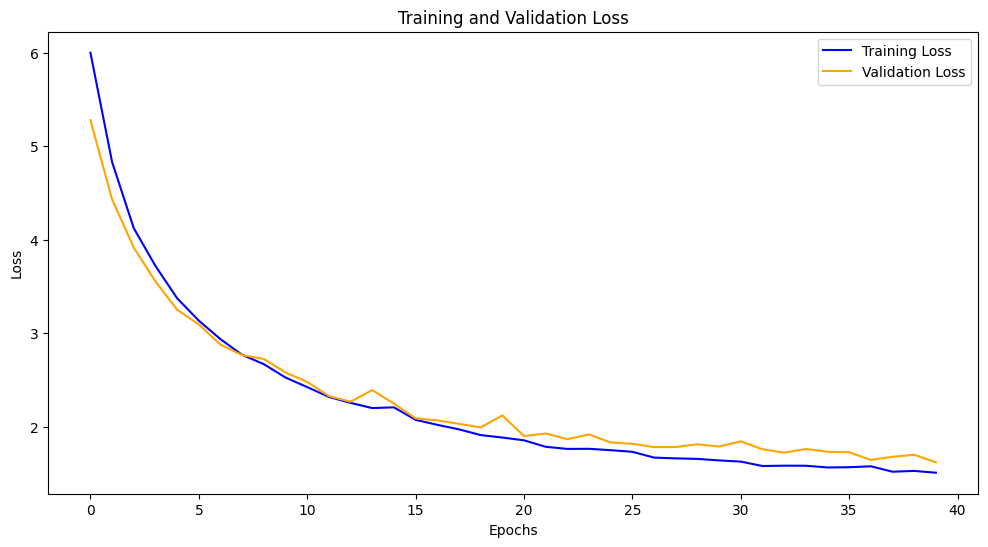

In [46]:
import keras_tuner as kt
from tensorflow.keras.applications import DenseNet169  # Import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam  # Import RMSprop optimizer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load DenseNet169 with pre-trained weights
def build_model(hp):
    densenet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers
    for layer in densenet169.layers:
        layer.trainable = False

    # Build the model
    x = densenet169.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_1', 0.1, 0.5, step=0.1))(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_2', 0.1, 0.5, step=0.1))(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularizer', 0.001, 0.01, step=0.001)))(x)
    x = Dropout(hp.Float('dropout_rate_3', 0.1, 0.5, step=0.1))(x)
    NUM_CLASSES = 5  # Change this to your number of classes
    densenet169_pred = Dense(NUM_CLASSES, activation='softmax')(x)

    model_169 = Model(inputs=densenet169.input, outputs=densenet169_pred)

    # Compile the model with RMSprop optimizer
    learning_rate = hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')
    model_169.compile(
        optimizer=Adam(learning_rate=learning_rate),  # Use RMSprop optimizer
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model_169

# Create a Keras Tuner object
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='densenet169_kt'
)

# Perform hyperparameter search
tuner.search(train_generator, validation_data=val_generator, epochs=5)

# Retrieve the best model
best_model_169 = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Train the best model
history_4=best_model_169.fit(train_generator, validation_data=val_generator, epochs=40)

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_4.history['loss'], label='Training Loss', color='blue')
plt.plot(history_4.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [47]:
val_loss, val_accuracy = best_model_169.evaluate(val_generator)

print("Validation Accuracy:", val_accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3578 - loss: 1.7211
Validation Accuracy: 0.39759036898612976


In [48]:
import os

# Define the directory and file path
model_directory = 'models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_save_path = os.path.join(model_directory, 'best_model_169.h5')

# Save the model
best_model_169.save(model_save_path)

# Print the path of the saved model
print("Model saved at:", model_save_path)


Model saved at: models\best_model_169.h5


In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Concatenate
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters 



# Load the trained models (adjust the paths to where your models are saved)
resnet50_model = load_model(r'models\best_model_50.h5')
inception_v3_model = load_model(r'models\best_model_v3.h5')
efficientnet_b5_model = load_model(r'models\best_model_B5.h5')
densenet169_model = load_model(r'models\best_model_169.h5')

# Define the hypermodel class
class EnsembleHyperModel(HyperModel):
    def __init__(self, resnet50_model, inception_v3_model, efficientnet_b5_model, densenet169_model):
        self.resnet50_model = resnet50_model
        self.inception_v3_model = inception_v3_model
        self.efficientnet_b5_model = efficientnet_b5_model
        self.densenet169_model = densenet169_model
    
    def build(self, hp):
    
        for layer in self.resnet50_model.layers:
            layer.trainable = False

        for layer in self.inception_v3_model.layers:
            layer.trainable = False

        for layer in self.efficientnet_b5_model.layers:
            layer.trainable = False

        for layer in self.densenet169_model.layers:
            layer.trainable = False


        # Remove the top layers from each model
        resnet50_output = self.resnet50_model.layer[-4].output
        inception_v3_output = self.inception_v3_model.layer[-4].output
        efficientnet_b5_output = self.efficientnet_b5_model.layer[-4].output
        densenet169_output = self.densenet169_model.layer[-4].output

         #Print the shape of the output tensors
        print("ResNet50 output shape:", resnet50_output.shape)
        print("Inception V3 output shape:", inception_v3_output.shape)
        print("EfficientNet B5 output shape:", efficientnet_b5_output.shape)
        print("DenseNet169 output shape:", densenet169_output.shape)

        # Combine the outputs
        combined = Concatenate()([resnet50_output, inception_v3_output, efficientnet_b5_output, densenet169_output])

        # Add new dense layers with L2 regularization and dropout
        x = Dense(hp.Int('units1', min_value=512, max_value=2048, step=128), 
                  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_reg1', min_value=1e-5, max_value=1e-2, sampling='LOG')))(combined)
        x = Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.7, step=0.1))(x)
        x = Dense(hp.Int('units2', min_value=256, max_value=1024, step=128), 
                  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_reg2', min_value=1e-5, max_value=1e-2, sampling='LOG')))(x)
        x = Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.7, step=0.1))(x)
        x = Dense(hp.Int('units3', min_value=128, max_value=512, step=128), 
                  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_reg3', min_value=1e-5, max_value=1e-2, sampling='LOG')))(x)
        x = Dropout(hp.Float('dropout3', min_value=0.2, max_value=0.7, step=0.1))(x)

        # Output layer
        final_output = Dense(NUM_CLASSES, activation='softmax')(x)

        # Create the new model
        ensemble_model = Model(inputs=[
            self.resnet50_model.input, 
            self.inception_v3_model.input, 
            self.efficientnet_b5_model.input, 
            self.densenet169_model.input
        ], outputs=final_output)

        # Compile the model
        learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        ensemble_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        return ensemble_model

# Initialize the hypermodel
hypermodel = EnsembleHyperModel(resnet50_model, inception_v3_model, efficientnet_b5_model, densenet169_model)

# Set up the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,  # Increased from 10 to 20 for more extensive search
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='ensemble_model'
)

# Custom generator function
def multi_input_generator(generator):
    while True:
        x, y = generator.next()
        yield [x, x, x], y


# Wrap the generators with the custom multi-input generator
train_multi_input_gen = multi_input_generator(train_generator)
val_multi_input_gen = multi_input_generator(val_generator)

# Perform hyperparameter search
tuner.search(train_multi_input_gen, validation_data=val_multi_input_gen, epochs=5, steps_per_epoch=len(train_generator), validation_steps=len(val_generator))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Configure the best model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Train the best model
history_5 = best_model.fit(train_multi_input_gen, validation_data=val_multi_input_gen, epochs=40, steps_per_epoch=len(train_generator), validation_steps=len(val_generator))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_4.history['loss'], label='Training Loss', color='blue')
plt.plot(history_4.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



AttributeError: 'Functional' object has no attribute 'layer'

In [ ]:
val_loss, val_accuracy = best_model_169.evaluate(val_generator)

print("Validation Accuracy:", val_accuracy)

In [ ]:
# Save the best model
import os

# Define the directory and file path
model_directory = 'models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
model_save_path = os.path.join(model_directory, 'best_ensemble_model.keras')

# Save the model
best_model.save(model_save_path)
print("Model saved at:", model_save_path)
